In [51]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

data = pd.read_csv('DataScience_salaries_2024.csv')

In [52]:
data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [53]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [55]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


/Users/rebekaborsikova/opt/anaconda3/envs/mypython3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



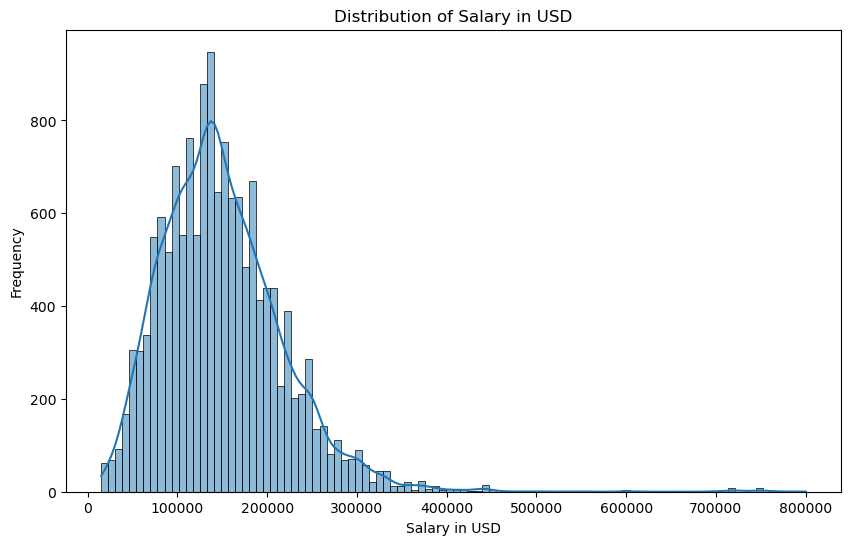

In [88]:
#plot distribution of salary in usd
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=100, kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


/Users/rebekaborsikova/opt/anaconda3/envs/mypython3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



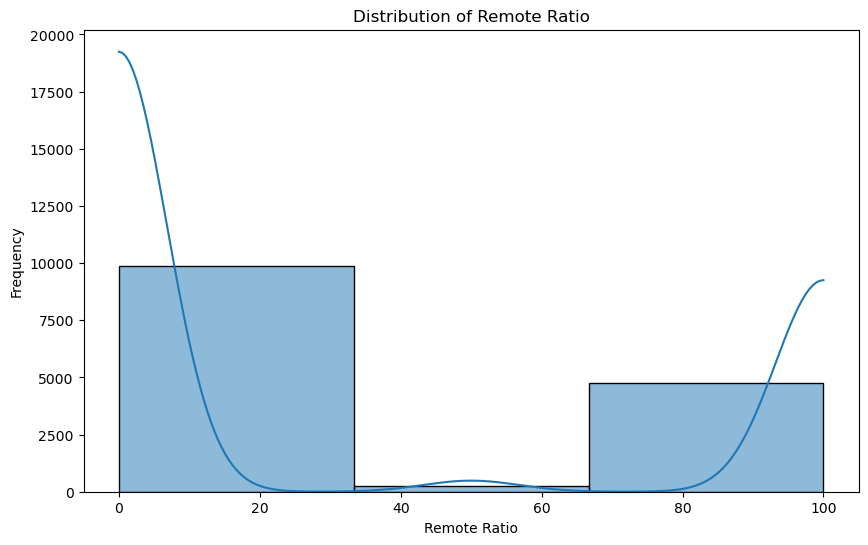

In [76]:
#plot distribution of remote ratio
plt.figure(figsize=(10, 6))
sns.histplot(data['remote_ratio'], bins=3, kde=True)
plt.title('Distribution of Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Frequency')
plt.show()

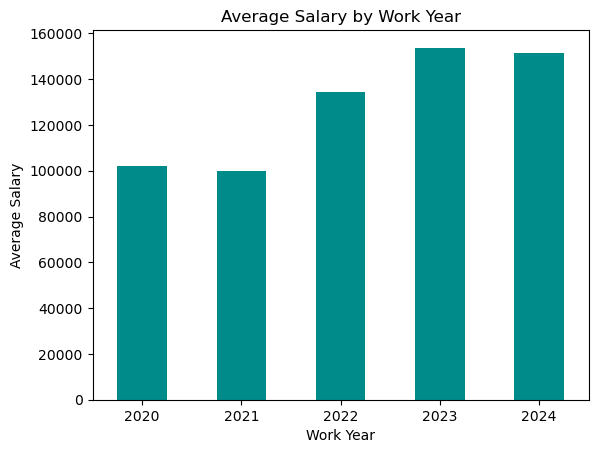

In [56]:
#group by work year and plot the average salary
data.groupby('work_year')['salary_in_usd'].mean().plot(kind='bar', color='darkcyan')
plt.title('Average Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

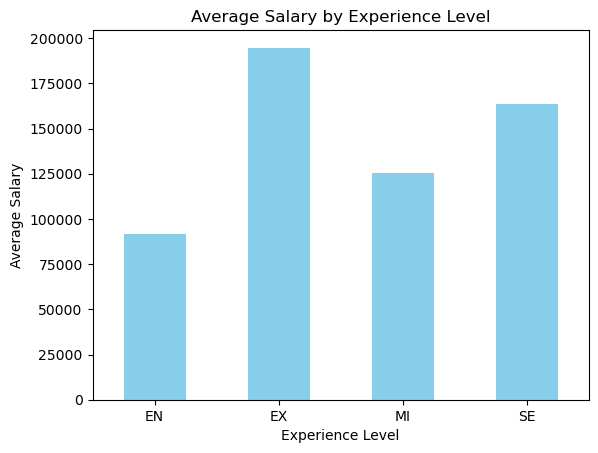

In [57]:
#average salary by experience level
data.groupby('experience_level')['salary_in_usd'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

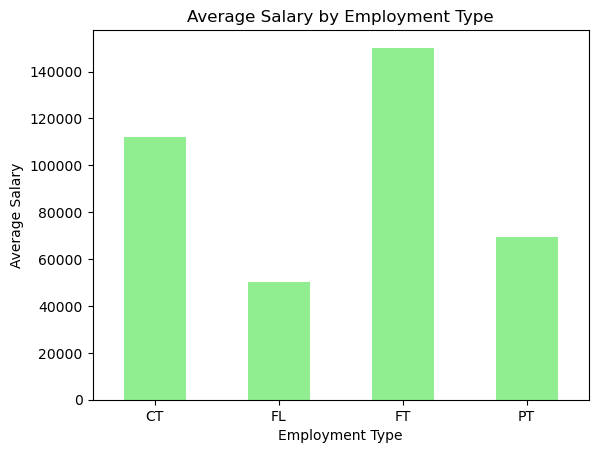

In [58]:
#average salary by employment type 
data.groupby('employment_type')['salary_in_usd'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

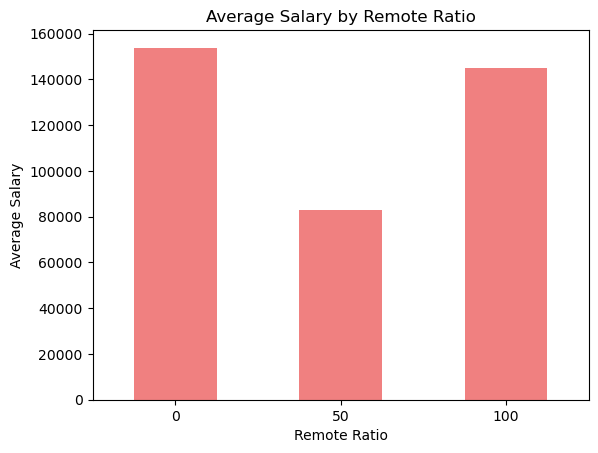

In [59]:
#average salary by remote ratio
data.groupby('remote_ratio')['salary_in_usd'].mean().plot(kind='bar', color='lightcoral')
plt.title('Average Salary by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

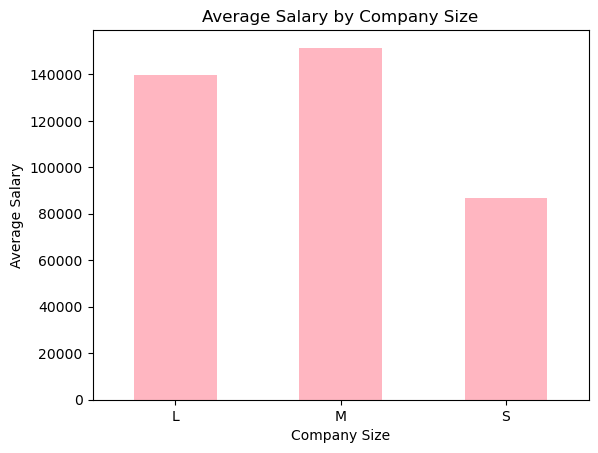

In [60]:
#average salary by company size
data.groupby('company_size')['salary_in_usd'].mean().plot(kind='bar', color='lightpink')
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

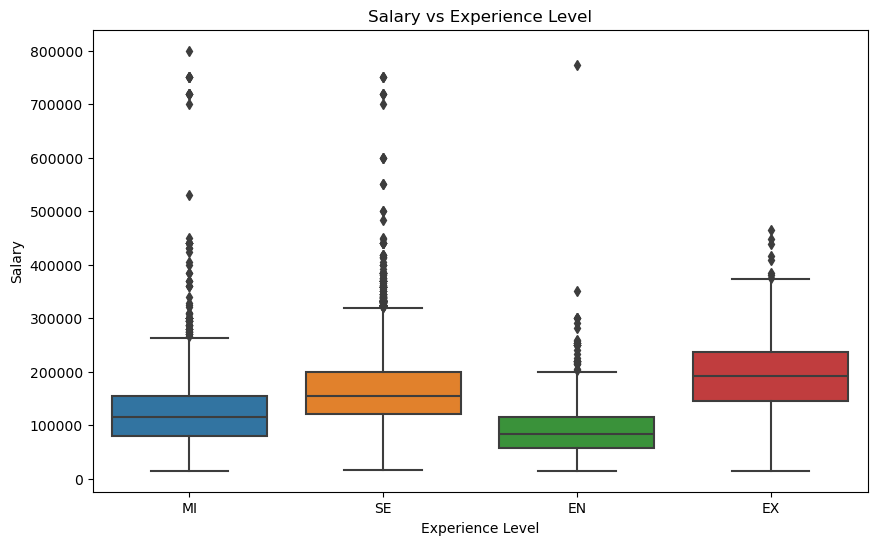

In [61]:
#relation between experience level and salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')

plt.show()

In [65]:
#work year to salary px.scatter
work_year_to_salary = px.scatter(data, x='salary_in_usd', y='work_year', title='Work Year vs Salary', labels={'work_year': 'Work Year', 'salary_in_usd': 'Salary'}, template='seaborn')
work_year_to_salary.show()

In [66]:
#salary to remote ratio px.scatter
salary_to_remote_ratio = px.scatter(data, x='salary_in_usd', y='remote_ratio', title='Salary vs Remote Ratio', labels={'salary_in_usd': 'Salary', 'remote_ratio': 'Remote Ratio'}, template='seaborn')
salary_to_remote_ratio.show()


In [82]:
#10 highest salaries in usd, showing job title and salary
data.nlargest(10, 'salary_in_usd')[['job_title', 'salary_in_usd']]


,job_title,salary_in_usd
66,AI Architect,800000
68,Data Analyst,774000
69,Analytics Engineer,750000
70,Machine Learning Scientist,750000
71,Data Analyst,750000
72,Machine Learning Scientist,750000
73,Machine Learning Scientist,750000
74,Machine Learning Engineer,750000
75,Data Engineer,750000
76,Data Scientist,750000


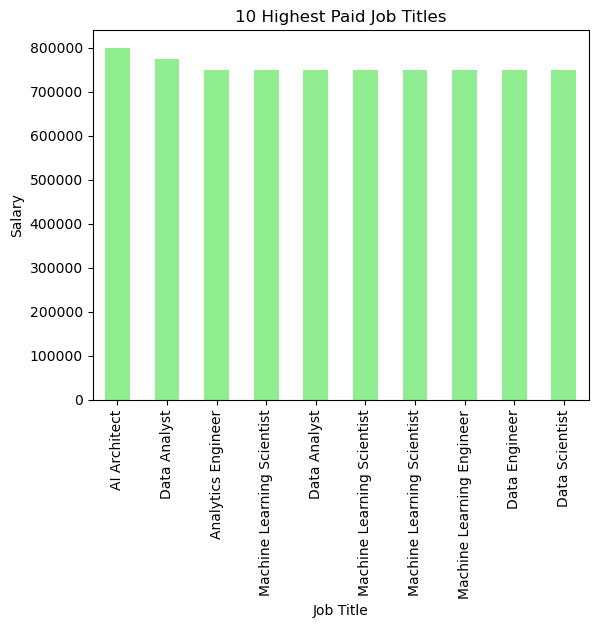

In [86]:
#plot 10 highest salaries in usd, showing job title and salary
data.nlargest(10, 'salary_in_usd')[['job_title', 'salary_in_usd']].plot(kind='bar', x='job_title', y='salary_in_usd', color='lightgreen', legend=False)
plt.title('10 Highest Paid Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


In [78]:
#what is the highest paid job title
data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)


job_title
Analytics Engineering Manager     399880.000000
Data Science Tech Lead            375000.000000
Head of Machine Learning          299758.428571
Managing Director Data Science    280000.000000
AWS Data Architect                258000.000000
AI Architect                      255142.357143
Cloud Data Architect              250000.000000
Director of Data Science          218775.333333
Head of Data                      210013.714286
Data Infrastructure Engineer      207332.812500
Name: salary_in_usd, dtype: float64

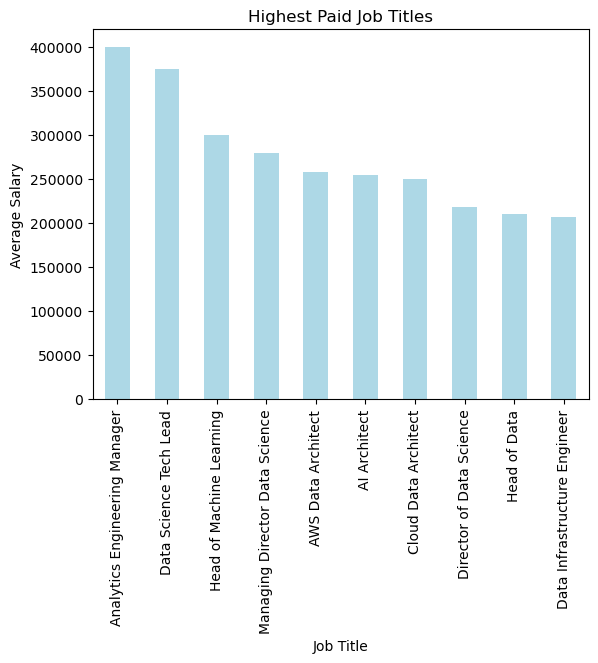

In [80]:
#plot highest paid job title
data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='lightblue')
plt.title('Highest Paid Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

In [91]:
#company location where the highest paid job title is located
data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)


company_location
QA    300000.000000
IL    217332.000000
PR    167500.000000
US    157410.126474
NZ    147681.666667
CA    145174.987245
EG    140869.230769
SA    139999.333333
AU    130126.471698
MX    129240.600000
Name: salary_in_usd, dtype: float64

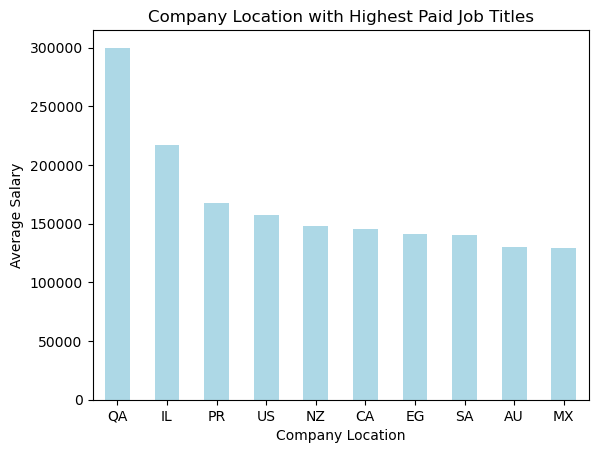

In [93]:
#plot company location where the highest paid job title is located
data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='lightblue')
plt.title('Company Location with Highest Paid Job Titles')
plt.xlabel('Company Location')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()